#Chapter 4: Real-World Data Representation Using Tensors
*   Representing different types of real-world data as PyTorch tensors
*   Working with range of data types, including spread sheet, time series, text, image, and medical imaging
*   Loading data from file
*   Converting data to tensors
*   Shaping tensors so they can be used as inputs for neural network models

This chapter will covers different types of data and how to get them represented as tensors. Also learn how to load the data from the most common non-disk formats and get a feeling for those data types structure so you can see how to prepare them for training a neural network.


In [ ]:
### **(0) Data Preparation**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import torch #PyTorch module for processing tensors
torch.set_printoptions(edgeitems=2,threshold=50)

In [ ]:
import imageio #Processing the image data into NumPy (Matrix structure for Python=similar with tensors)

url="https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/data/p1ch4/image-dog/bobby.jpg?raw=true"
img_arr=imageio.imread(url)
img_arr.shape
#The shape: (Height, Width, Channels-RGB)

(720, 1280, 3)

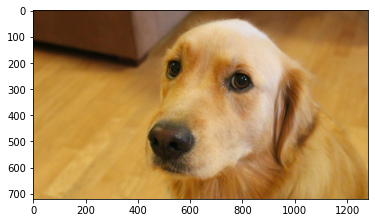

In [ ]:
plt.imshow(img_arr)

In [ ]:
print(img_arr)

[[[ 77  45  22]
  [ 77  45  22]
  [ 78  46  21]
  ...
  [118  78  52]
  [117  77  51]
  [116  76  51]]

 [[ 75  43  20]
  [ 76  44  21]
  [ 77  45  20]
  ...
  [118  78  52]
  [117  77  51]
  [116  76  50]]

 [[ 74  39  17]
  [ 75  41  16]
  [ 77  43  18]
  ...
  [119  80  51]
  [117  77  51]
  [116  76  50]]

 ...

 [[215 165  78]
  [216 166  79]
  [217 167  80]
  ...
  [172 122  51]
  [174 124  53]
  [174 124  53]]

 [[215 165  78]
  [216 166  79]
  [217 167  80]
  ...
  [173 123  54]
  [174 124  55]
  [174 124  55]]

 [[215 165  78]
  [216 166  79]
  [217 167  80]
  ...
  [159 108  42]
  [158 107  41]
  [158 107  41]]]


In [ ]:
#From raw data (imageio) to PyTorch Tensors
img=torch.from_numpy(img_arr) #Imageio import the data with the form of NumPy
out=img.permute(2,0,1) #We change the dimension of the data here
#This permute change the formah of the img shape from (height, width, channels) to (channels,heigth,width)

In [ ]:
img_arr.shape

(720, 1280, 3)

In [ ]:
img.shape

torch.Size([720, 1280, 3])

In [ ]:
out.shape

torch.Size([3, 720, 1280])

In [ ]:
#Import multiple images files into tensors
#Create empty tensors
batch_size=100
batch=torch.zeros(batch_size,3,256,256,dtype=torch.uint8)

In [21]:
import os

data_dir="/content/cats"
filenames=[name for name in os.listdir(data_dir) if os.path.splitext(name)[-1]=='.png']
for i, filename in enumerate(filenames): 
  img_arr=imageio.imread(os.path.join(data_dir,filename))
  img_t=torch.from_numpy(img_arr)
  img_t=img_t.permute(2,0,1)
  #Below, we keep only the first three channels.
  #Sometimes, images will have an alpha channel indicating transparency as a fourth channel.
  img_t=img_t[:3]
  batch[i]=img_t
print(filenames)

['cat3.png', 'cat1.png', 'cat2.png']


In [ ]:
batch=batch.float()
batch/=255.0

In [ ]:
n_channels=batch.shape[1]
for c in range(n_channels):
  mean=torch.mean(batch[:,c])
  std=torch.std(batch[:,c])
  batch[:,c]=(batch[:,c]-mean)/std